In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt



In [16]:
df = pd.read_csv('../../../Train.csv', low_memory=False)

Eliminate:
SalesID
MachineID
fiModelSeries
fiModelDescriptor
fiProductClassDesc
ProductGroupDesc
Enclosure_Type


YearMade: remove wrong years



In [17]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [38]:
df['MachineHoursCurrentMeter']

0           68.0
1         4640.0
2         2838.0
3         3486.0
4          722.0
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: MachineHoursCurrentMeter, Length: 401125, dtype: float64

In [37]:
len(df['MachineHoursCurrentMeter'].unique())

15153

In [25]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

array([[<AxesSubplot:title={'center':'auctioneerID'}>]], dtype=object)

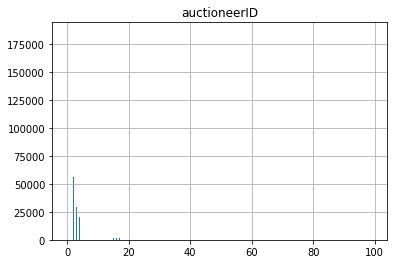

In [48]:
df.hist(column = ['Engine_Horsepower'], bins=200)

<AxesSubplot:>

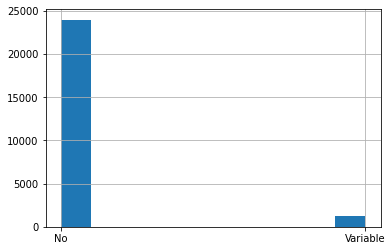

Executing shutdown due to inactivity...


2020-11-06 11:36:38,609 - INFO     - Executing shutdown due to inactivity...


In [61]:
df['Engine_Horsepower'].hist()

In [74]:
df_usage = df[df.UsageBand.notnull()]

In [78]:
df_usage.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
def formatting(df):
    '''Format Dataframe for Price Prediction Model
    
    
    '''
    df_usage = df[df.UsageBand.notnull()]
    
    return formatted_df

In [76]:
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69639 entries, 0 to 401055
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   69639 non-null  int64  
 1   SalePrice                 69639 non-null  int64  
 2   MachineID                 69639 non-null  int64  
 3   ModelID                   69639 non-null  int64  
 4   datasource                69639 non-null  int64  
 5   auctioneerID              64946 non-null  float64
 6   YearMade                  69639 non-null  int64  
 7   MachineHoursCurrentMeter  69639 non-null  float64
 8   UsageBand                 69639 non-null  object 
 9   saledate                  69639 non-null  object 
 10  fiModelDesc               69639 non-null  object 
 11  fiBaseModel               69639 non-null  object 
 12  fiSecondaryDesc           47886 non-null  object 
 13  fiModelSeries             10964 non-null  object 
 14  fiMod

Cols to make into Categories:
Usage Band: ['Low', 'High', 'Medium']
datasource: [121, 132, 136, 149, 172]

In [81]:
df_usage['datasource'].unique()

array([121, 132, 136, 149, 172])

In [129]:
def drop_column(df, column_name):
    df = df.drop(columns = column_name)
    return df
    

def formatting(df):
    '''Format Dataframe for Price Prediction Model
    
    
    '''
    df_usage = df[df.UsageBand.notnull()]
    drop_list = ['ProductGroupDesc', 'Enclosure_Type', 'Coupler_System', 'SalesID', 'auctioneerID', 'Engine_Horsepower', 'MachineID', 'ModelID',
                'fiModelDesc', 'fiBaseModel','fiSecondaryDesc','fiModelSeries','fiModelDescriptor', 'fiProductClassDesc']
    dummies = ['UsageBand', 'datasource',
       'ProductSize',
       'state', 'ProductGroup', 
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls']
    
    df_usage = pd.get_dummies(df_usage, columns = dummies)
    
    for col in drop_list:
        df_usage = drop_column(df_usage, col)

    df_usage['saledate'] = pd.to_datetime(df_usage['saledate'])
    df_usage['saledate'] = df_usage['saledate'].dt.year

    df_usage['age_at_sale'] = df_usage['saledate']- df_usage['YearMade']
    df_usage = df_usage[df_usage['age_at_sale'] <200]

    y = df_usage['SalePrice']
    X = df_usage.loc[:, df_usage.columns != 'SalePrice']

    return X,y

In [269]:
X,y = formatting(df)

In [183]:
pwd

'/home/george/Desktop/CaseStudy/regression-case-study/predict_auction_price/notebooks'

In [204]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression

from sklearn.preprocessing import StandardScaler
from utils import XyScaler

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [271]:
ridge = Ridge(alpha = ridge_optimal_alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=11.277396119740903)

In [272]:
y_hat = ridge.predict(X_test)

print(mean_squared_error(y_test, y_hat))

175361990.39876246


In [254]:
def cv(X, y, base_estimator, n_folds=n_folds, random_seed=None):
    """Estimate the in- and out-of-sample error of a model using cross
    validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds)

    test_cv_errors, train_cv_errors = np.zeros(n_folds), np.zeros(n_folds)

    X = np.array(X)
    y = np.array(y)

    for idx, (train, test) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train], y[train]
        X_cv_test, y_cv_test = X[test], y[test]

        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)

        # Fit estimator
        model = base_estimator
        model.fit(X_cv_train_std, y_cv_train_std)

        # Measure performance
        y_hat_train = model.predict(X_cv_train_std)
        y_hat_test = model.predict(X_cv_test_std)

        # Calclate the error metrics
        train_cv_errors[idx] = mean_squared_error(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = mean_squared_error(y_cv_test_std, y_hat_test)

    return train_cv_errors, test_cv_errors

In [255]:
cv(X, y, Ridge(alpha = ridge_optimal_alpha), n_folds=10, random_seed=None)

(array([0.25546262, 0.25541961, 0.25263772, 0.25434111, 0.24693463,
        0.25152918, 0.26438403, 0.24823501, 0.2560964 , 0.2526556 ]),
 array([0.22819465, 0.23844828, 0.27121011, 0.26717647, 0.29565655,
        0.25512974, 0.32731649, 0.30726921, 0.30372605, 0.24874709]))

In [256]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various
    values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression
      object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of
      alpha and each cross validation fold.  Each row represents a CV fold, and
      each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    X = np.array(X)
    y = np.array(y)
    for alpha in alphas:
        kf = KFold(n_splits=n_folds)
        
        for idx, (train, test) in enumerate(kf.split(X)):
    
            X_cv_train, y_cv_train = X[train], y[train]
            X_cv_test, y_cv_test = X[test], y[test]
      
            standardizer = XyScaler()
            standardizer.fit(X_cv_train, y_cv_train)
            X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
            X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
            
        
            m = model(alpha = alpha)
            m.fit(X_cv_train_std, y_cv_train_std)
        
            y_hat_train = m.predict(X_cv_train_std)
            y_hat_test = m.predict(X_cv_test_std)
        
            cv_errors_train[alpha][idx] = mean_squared_error(y_cv_train_std, y_hat_train)
            cv_errors_test[alpha][idx] = mean_squared_error(y_cv_test_std, y_hat_test)

    return cv_errors_train, cv_errors_test

In [258]:
ridge_alphas = np.logspace(-2, 8, num=250)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(X_train, y_train, Ridge, ridge_alphas) 

In [261]:
avg_errors_train = ridge_cv_errors_train.mean()
avg_errors_test = ridge_cv_errors_test.mean()


In [262]:
def get_optimal_alpha(avg_errors_test):
    alphas = avg_errors_test.index
    optimal_idx = np.argmin(avg_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(avg_errors_test)

In [263]:
features = X.columns
df_coefs = pd.DataFrame(np.empty(shape=(len(ridge_alphas), X.shape[1])), columns = features, index = ridge_alphas)

In [264]:
standardizer = XyScaler()
X_train = np.array(X_train)
y_train = np.array(y_train)
standardizer.fit(X_train, y_train)
X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)

for idx, alpha in enumerate(ridge_alphas):
    model = Ridge(alpha = alpha)        
    model.fit(X_cv_train_std, y_cv_train_std)
    df_coefs.iloc[idx] = model.coef_ #this gives a list of coefficients for all features

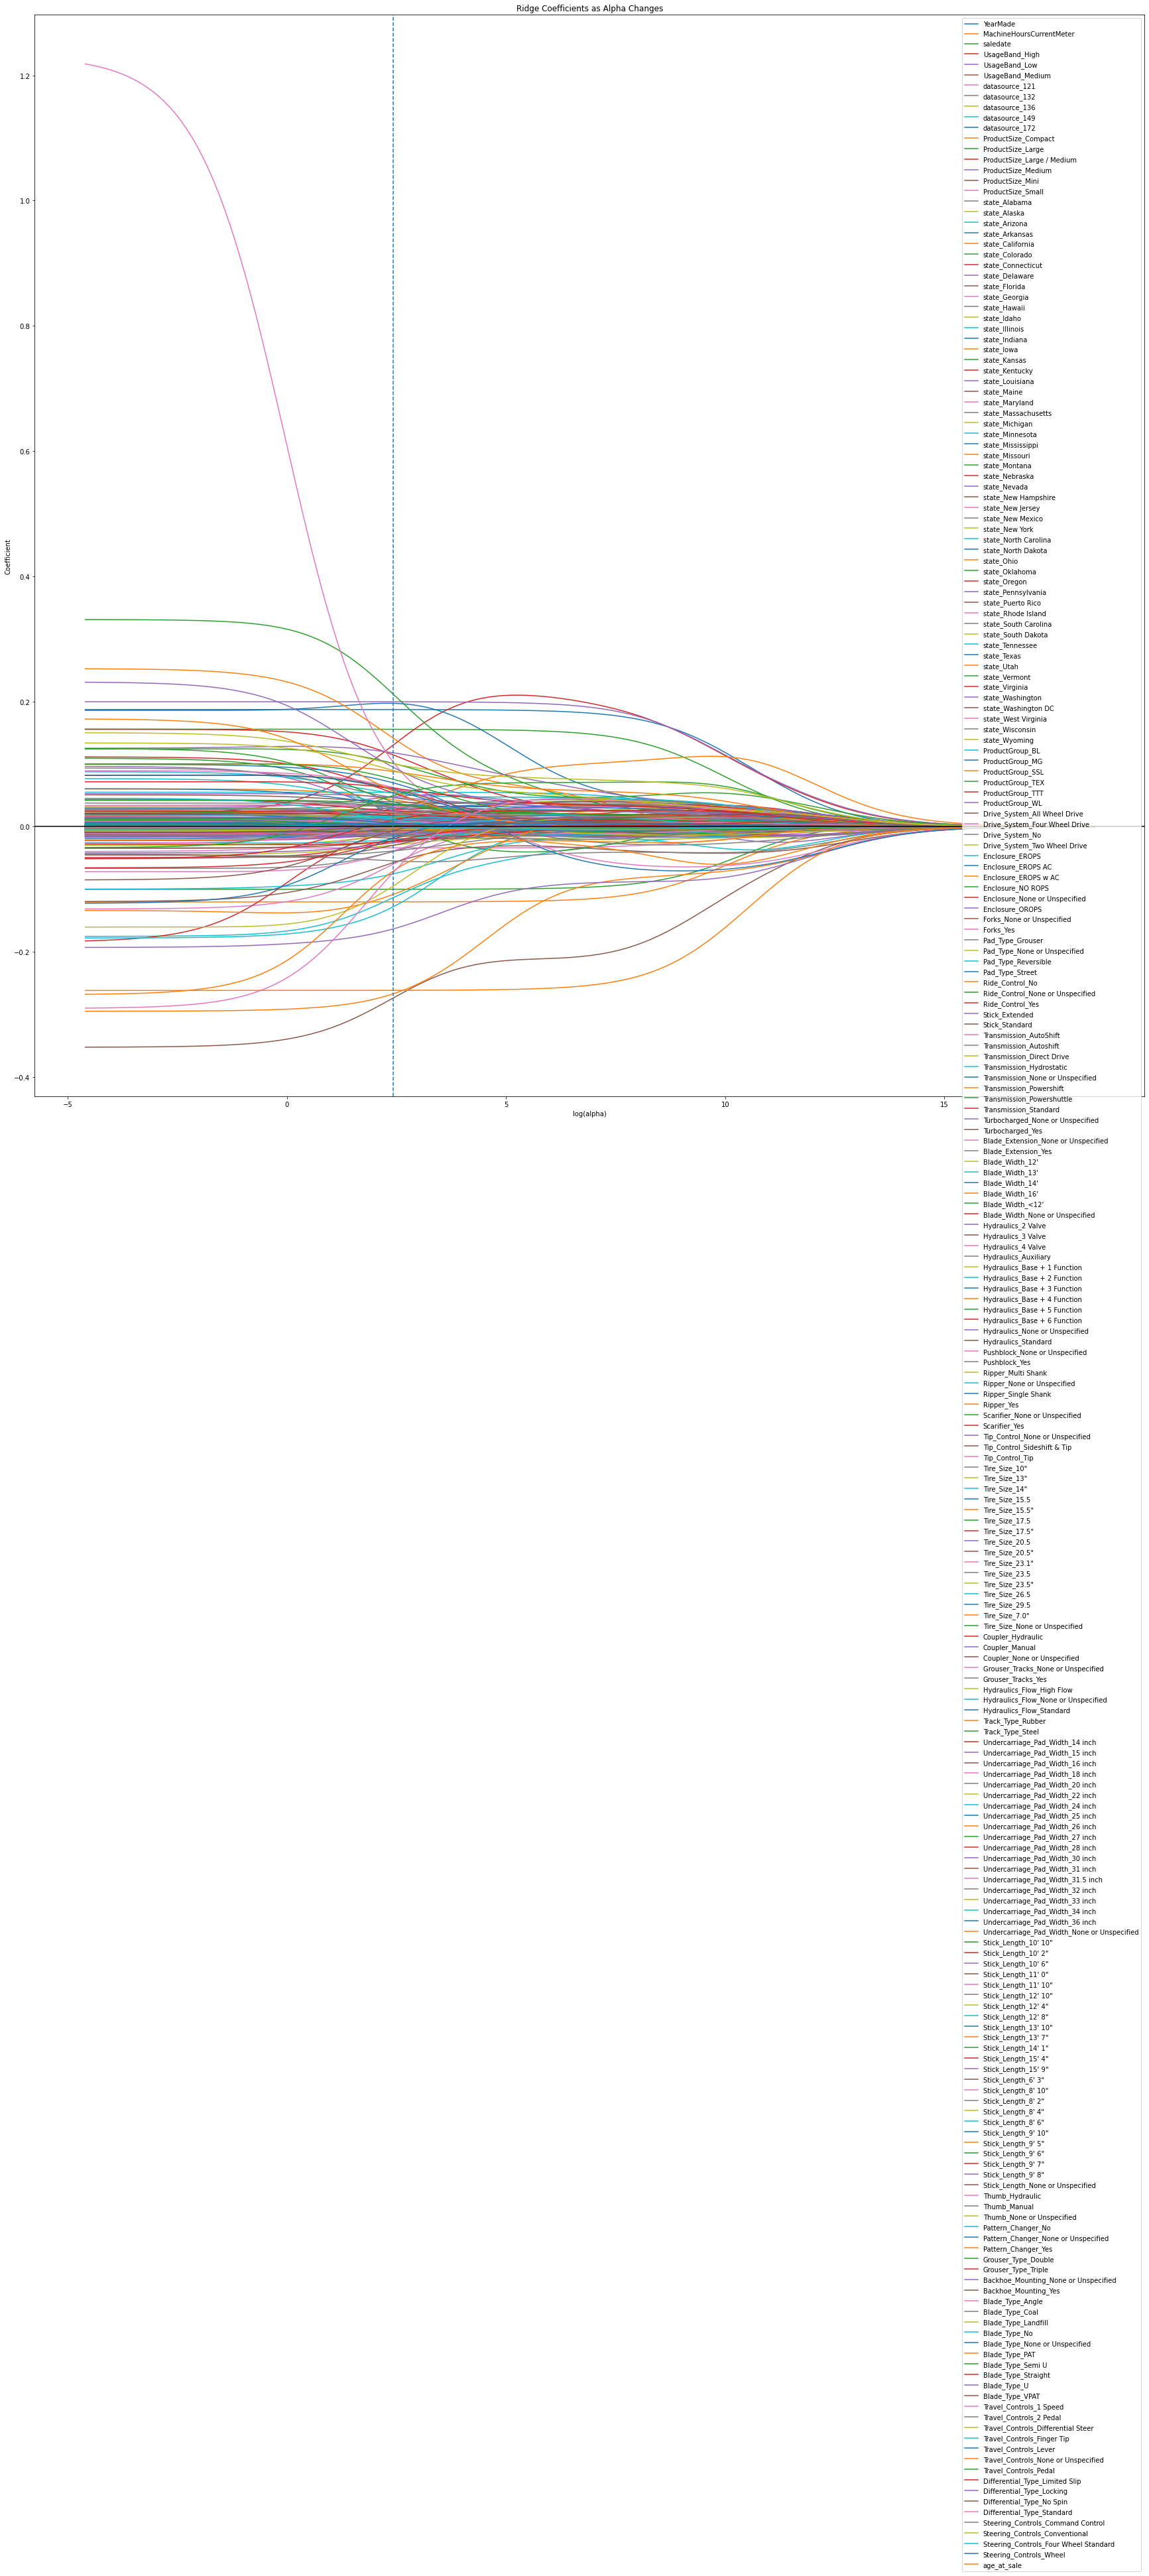

In [268]:
fig, ax = plt.subplots(figsize = (30,30))
for col in df_coefs.columns:
    ax.plot(np.log(df_coefs.index), df_coefs[col], label = str(col))
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Coefficient')
ax.axhline(0, color = 'k')
ax.set_title('Ridge Coefficients as Alpha Changes')
ax.axvline(np.log(ridge_optimal_alpha), linestyle = 'dashed')
ax.legend();
plt.savefig('../presentation/ridge_lambda.png', dpi=150)

11.513953993264481